In [1]:
### Load libraries and load 2017 data

In [1]:
library(sqldf)
library(tidyverse)
library(lubridate)

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [3]:
#airq<-read.csv("https://raw.githubusercontent.com/Maplub/MonthlyAirQuality/master/dataMar2017.csv",stringsAsFactors = FALSE)

In [2]:
airq<-read.csv("https://raw.githubusercontent.com/Maplub/AirQualityData/master/H_Mar_PM25_2561.csv")

In [4]:
airq2<-read.csv("https://raw.githubusercontent.com/Maplub/AirQualityData/master/H_PM25_Apr_2561.csv")

In [5]:
head(airq)

sensorid,date,h,pm25
CU-S0002,2018-03-01,9,43.06250
CU-S0002,2018-03-01,10,45.21875
CU-S0002,2018-03-01,11,48.02083
CU-S0002,2018-03-01,12,46.94792
CU-S0002,2018-03-01,13,44.92708
CU-S0002,2018-03-01,14,45.35417


In [6]:
head(airq2)

sensorid,date,h,pm25
CU-S0002,2018-04-01,9,48.62500
CU-S0002,2018-04-01,10,48.15625
CU-S0002,2018-04-01,11,47.75000
CU-S0002,2018-04-01,12,47.91667
CU-S0002,2018-04-01,13,48.26042
CU-S0002,2018-04-01,14,49.10417


In [ ]:
colnames(airq)<-gsub("payload.", "", colnames(airq))

In [7]:
airq$datetime<-as.POSIXct(airq$time,format="%Y-%m-%dT%H:%M:%S")

ERROR: Error in as.POSIXct.default(airq$time, format = "%Y-%m-%dT%H:%M:%S"): do not know how to convert 'airq$time' to class “POSIXct”


In [8]:
airq$date<-as.Date(airq$time,format="%Y-%m-%d")

ERROR: Error in as.Date.default(airq$time, format = "%Y-%m-%d"): do not know how to convert 'airq$time' to class “Date”


In [ ]:
airq$hour<-hour(airq$datetime)

### Get hourly average

In [5]:
hourlyairq<-aggregate(airq["pm25"], by=airq[c("id","date","hour")], FUN=mean,na.rm=TRUE)

ERROR: Error in aggregate(airq["pm25"], by = airq[c("id", "date", "hour")], FUN = mean, : object 'airq' not found


In [6]:
hourlyairq<-read.csv("hourlyMarch.csv")
hourlyairqf<-read.csv("febhourly.csv")

In [7]:
hourlyairq$datehr<-paste(hourlyairq$date,sprintf("%02d", hourlyairq$hour),sep = " ")
hourlyairq$datehr<-paste(hourlyairq$datehr,":00:00",sep="")
hourlyairq$datehr<-as.POSIXct(strptime(hourlyairq$datehr,format="%Y-%m-%d %H:%M:%S"))

In [ ]:
#write.csv(hourlyairq,"hourlyMarch.csv")

In [8]:
head(hourlyairq)

X,id,date,hour,pm25,datehr
1,CU-S0002,2017-03-01,0,44.65513,2017-03-01
2,CU-S0003,2017-03-01,0,48.56242,2017-03-01
3,CU-S0006,2017-03-01,0,36.03312,2017-03-01
4,CU-S0009,2017-03-01,0,40.00774,2017-03-01
5,CU-S00103,2017-03-01,0,38.19167,2017-03-01
6,CU-S00104,2017-03-01,0,48.06909,2017-03-01


In [15]:
hourly<-sqldf("select id,hour,avg(pm25) as pm25 from hourlyairqf group by hour,id")

Hourly data of PM2.5 in March of all stations shows two peaks within a day with high peak in the morning (around 9:00), and another peak around 20:00- 21:00. The result is similar to (Li, 2019) in China.

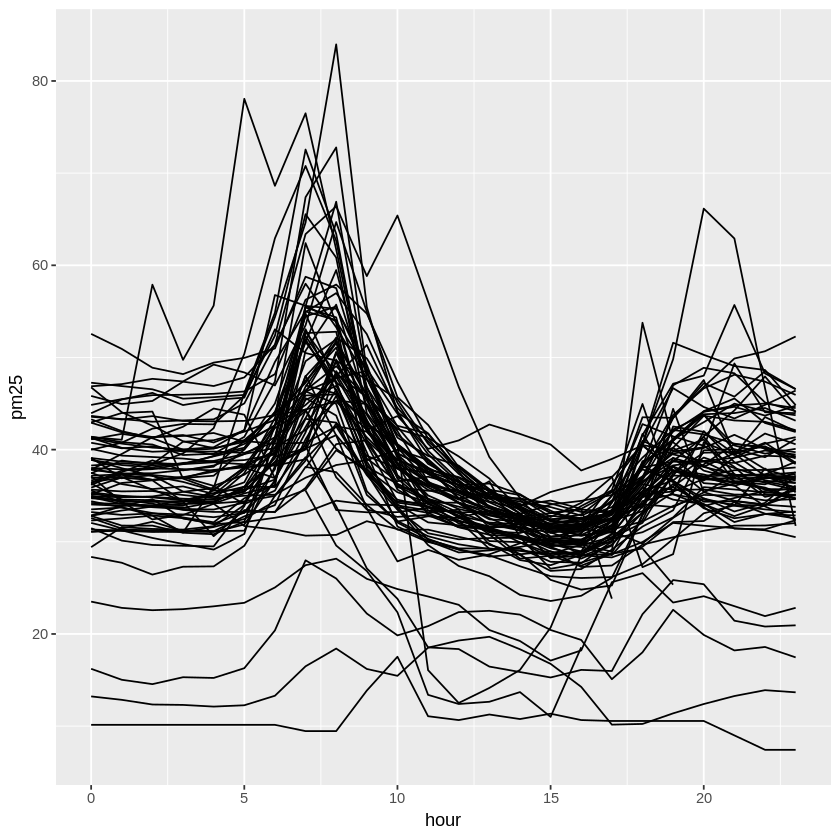

In [18]:
ggplot(data=hourly, aes(x=hour, y=pm25, group=id)) + geom_line()